**TA:**
*   Think about how we can generate new features or new insightful informations that are/might be usefull

**Bacao:** 
*   Likes Boxplots

**Notes about the dataset:**
* There are 15 different Cuisines 
    * Cluster over Cusines
* Different days and hours of the day
    * Clustering over hours/days to create coupons 


**New features:**
1. CUI notes monetary units --> create new feature with money spend
2. Sum up DOW to get sum of orders
3. Frequency of orders  = Sum of orders dividided by 90 days
4. Money spent per order
5. 

### Import packages 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
print("Loading data...")

# <span style="color:green"> Part 1 -  Data loading and Preprocessing </span> 

## 1.1 Read in Data



Data description:

<img src="../Guideline&Templates/dataset_description.png" alt="Sample Image" width="600" height="700">

## Quick look at the data

In [2]:
# read in data | set customer_id as index 
df = pd.read_csv('../Data/DM2425_ABCDEats_DATASET.csv', index_col='customer_id')
df.head()

,customer_region,customer_age,vendor_count,product_count,is_chain,first_order,last_order,last_promo,payment_method,CUI_American,...,HR_14,HR_15,HR_16,HR_17,HR_18,HR_19,HR_20,HR_21,HR_22,HR_23
customer_id,,,,,,,,,,,,,,,,,,,,,
1b8f824d5e,2360,18.0,2,5,1,0.0,1,DELIVERY,DIGI,0.00,...,0,0,0,0,2,0,0,0,0,0
5d272b9dcb,8670,17.0,2,2,2,0.0,1,DISCOUNT,DIGI,12.82,...,0,0,0,0,0,0,0,0,0,0
f6d1b2ba63,4660,38.0,1,2,2,0.0,1,DISCOUNT,CASH,9.20,...,0,0,0,0,0,0,0,0,0,0
180c632ed8,4660,NaN,2,3,1,0.0,2,DELIVERY,DIGI,0.00,...,1,0,0,0,0,0,0,0,0,0
4eb37a6705,4660,20.0,2,5,0,0.0,2,-,DIGI,14.57,...,0,0,0,0,0,0,0,0,0,0


## Preprocessing

In [3]:
# print dimensions of df with text 
print('The dataset has {} rows and {} columns'.format(df.shape[0], df.shape[1]))
df.describe().T

The dataset has 31888 rows and 55 columns


,count,mean,std,min,25%,50%,75%,max
customer_age,31161.0,27.506499,7.160898,15.0,23.0,26.0,31.00,80.00
vendor_count,31888.0,3.102609,2.771587,0.0,1.0,2.0,4.00,41.00
product_count,31888.0,5.668245,6.957287,0.0,2.0,3.0,7.00,269.00
is_chain,31888.0,2.818866,3.977529,0.0,1.0,2.0,3.00,83.00
first_order,31782.0,28.478604,24.109086,0.0,7.0,22.0,45.00,90.00
last_order,31888.0,63.675521,23.226123,0.0,49.0,70.0,83.00,90.00
CUI_American,31888.0,4.880438,11.654018,0.0,0.0,0.0,5.66,280.21
CUI_Asian,31888.0,9.960451,23.564351,0.0,0.0,0.0,11.83,896.71
CUI_Beverages,31888.0,2.300633,8.479734,0.0,0.0,0.0,0.00,229.22
CUI_Cafe,31888.0,0.801163,6.427132,0.0,0.0,0.0,0.00,326.10


In [4]:
# drop HR_0 column, it doesn not contain any information as all values are 0/NaN
df.drop(columns='HR_0', inplace=True)

In [5]:
# print out the unique values of customer_region, last_promo, payment_method
print('Unique values of customer_region:', df['customer_region'].unique())
print('Unique values of last_promo:', df['last_promo'].unique())
print('Unique values of payment_method:', df['payment_method'].unique())
df.describe(include='object').T

Unique values of customer_region: ['2360' '8670' '4660' '2440' '-' '4140' '2490' '8370' '8550']
Unique values of last_promo: ['DELIVERY' 'DISCOUNT' '-' 'FREEBIE']
Unique values of payment_method: ['DIGI' 'CASH' 'CARD']


,count,unique,top,freq
customer_region,31888,9,8670,9761
last_promo,31888,4,-,16748
payment_method,31888,3,CARD,20161


In [6]:
# Check info for all columns that do not contain HR, DOW, CUI
df[[column for column in df.columns if all(x not in column for x in ["HR", "DOW", "CUI"])]].info()

<class 'pandas.core.frame.DataFrame'>
Index: 31888 entries, 1b8f824d5e to fd40d3b0e0
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   customer_region  31888 non-null  object 
 1   customer_age     31161 non-null  float64
 2   vendor_count     31888 non-null  int64  
 3   product_count    31888 non-null  int64  
 4   is_chain         31888 non-null  int64  
 5   first_order      31782 non-null  float64
 6   last_order       31888 non-null  int64  
 7   last_promo       31888 non-null  object 
 8   payment_method   31888 non-null  object 
dtypes: float64(2), int64(4), object(3)
memory usage: 2.4+ MB


In [7]:
# check how many missing values are in the dataset only print those that are not 0
missing_values = df.isnull().sum()
missing_values[missing_values > 0]

# drop rows with missing values
df.dropna(inplace=True)
print('The cleaned dataset has {} rows and {} columns'.format(df.shape[0], df.shape[1]))

The cleaned dataset has 31057 rows and 54 columns


There are some missing values in first_order, last_order and customer_age
* over 700 missing in customer_age


In [8]:
round(df['customer_age'].mean(skipna=True))

28

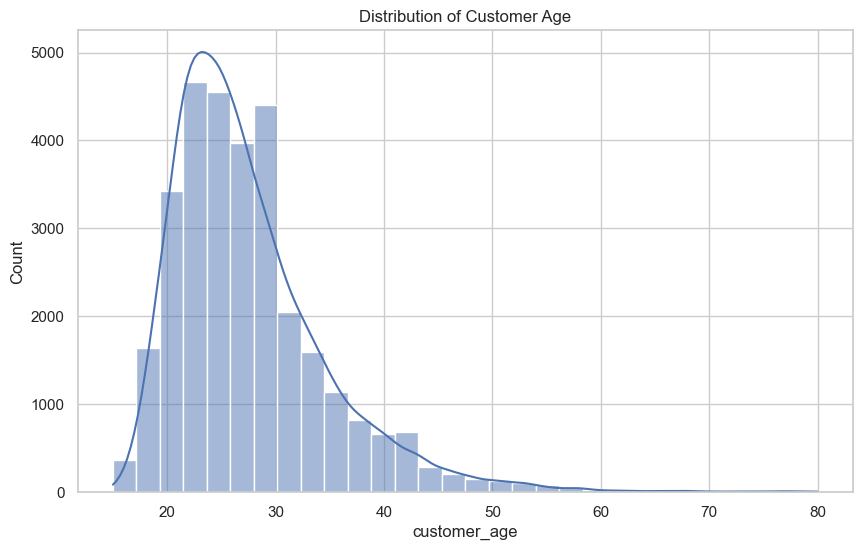

The average age : 28
The median age : 26


In [9]:
# distribution of customer_age
sns.set_theme(style='whitegrid')
plt.figure(figsize=(10,6))
sns.histplot(df['customer_age'], bins=30, kde=True)
plt.title('Distribution of Customer Age')
plt.show()

# average and median age
print('The average age :', round(df['customer_age'].mean(skipna=True)))
print('The median age :', int(df['customer_age'].median()))

In [10]:
# supress warnings for this cell
import warnings
warnings.filterwarnings('ignore')

# check unique values for customer_age
print('Unique values of customer_age:', df['customer_age'].unique())

# they are all int or nan values so we can convert from float to int 
df['customer_age'] = df['customer_age'].astype('Int64')
# fill missing values with the mean of the column
# df["customer_age"].fillna(round(df['customer_age'].mean(skipna=True)), inplace=True)


Unique values of customer_age: [18. 17. 38. 20. 40. 24. 27. 33. 26. 21. 51. 35. 22. 31. 15. 47. 19. 28.
 32. 25. 37. 42. 48. 16. 34. 29. 23. 30. 39. 46. 41. 49. 53. 36. 43. 44.
 45. 57. 58. 68. 56. 61. 60. 54. 59. 50. 55. 52. 65. 75. 66. 79. 80. 63.
 77. 62. 69. 72. 64. 76. 74. 67. 70. 78. 71. 73.]


In [11]:
# check info for all columns that contain HR and DOW
df[[column for column in df.columns if any(x in column for x in [ "DOW", "CUI"])]].info()

# no missing values in the dataset

<class 'pandas.core.frame.DataFrame'>
Index: 31057 entries, 1b8f824d5e to d7c7face7e
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CUI_American              31057 non-null  float64
 1   CUI_Asian                 31057 non-null  float64
 2   CUI_Beverages             31057 non-null  float64
 3   CUI_Cafe                  31057 non-null  float64
 4   CUI_Chicken Dishes        31057 non-null  float64
 5   CUI_Chinese               31057 non-null  float64
 6   CUI_Desserts              31057 non-null  float64
 7   CUI_Healthy               31057 non-null  float64
 8   CUI_Indian                31057 non-null  float64
 9   CUI_Italian               31057 non-null  float64
 10  CUI_Japanese              31057 non-null  float64
 11  CUI_Noodle Dishes         31057 non-null  float64
 12  CUI_OTHER                 31057 non-null  float64
 13  CUI_Street Food / Snacks  31057 non-null  float64
 1

In [12]:
# check info for HR columns
df[[column for column in df.columns if "HR" in column]].info()

<class 'pandas.core.frame.DataFrame'>
Index: 31057 entries, 1b8f824d5e to d7c7face7e
Data columns (total 23 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   HR_1    31057 non-null  int64
 1   HR_2    31057 non-null  int64
 2   HR_3    31057 non-null  int64
 3   HR_4    31057 non-null  int64
 4   HR_5    31057 non-null  int64
 5   HR_6    31057 non-null  int64
 6   HR_7    31057 non-null  int64
 7   HR_8    31057 non-null  int64
 8   HR_9    31057 non-null  int64
 9   HR_10   31057 non-null  int64
 10  HR_11   31057 non-null  int64
 11  HR_12   31057 non-null  int64
 12  HR_13   31057 non-null  int64
 13  HR_14   31057 non-null  int64
 14  HR_15   31057 non-null  int64
 15  HR_16   31057 non-null  int64
 16  HR_17   31057 non-null  int64
 17  HR_18   31057 non-null  int64
 18  HR_19   31057 non-null  int64
 19  HR_20   31057 non-null  int64
 20  HR_21   31057 non-null  int64
 21  HR_22   31057 non-null  int64
 22  HR_23   31057 non-null  int64
dtypes:

###  Cusines columns

In [13]:
print("There are: ", len([column for column in df.columns if "CUI" in column ]), "columns with CUI in the name")

# create a new column that sums up the money spend 
df["money_spend"] = df[[column for column in df.columns if "CUI" in column ]].sum(axis= 1)

# look at the columns
df[["money_spend"] + [column for column in df.columns if "CUI" in column ] ].head()

There are:  15 columns with CUI in the name


,money_spend,CUI_American,CUI_Asian,CUI_Beverages,CUI_Cafe,CUI_Chicken Dishes,CUI_Chinese,CUI_Desserts,CUI_Healthy,CUI_Indian,CUI_Italian,CUI_Japanese,CUI_Noodle Dishes,CUI_OTHER,CUI_Street Food / Snacks,CUI_Thai
customer_id,,,,,,,,,,,,,,,,
1b8f824d5e,28.88,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,28.88,0.0,0.0,0.0,0.0,0.0,0.0
5d272b9dcb,19.21,12.82,6.39,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0
f6d1b2ba63,9.20,9.20,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0
4eb37a6705,55.44,14.57,40.87,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0
6aef2b6726,24.92,0.00,24.92,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0


###  Day of the Week columns

In [14]:
df[[column for column in df.columns if "DOW" in column ]].head()

,DOW_0,DOW_1,DOW_2,DOW_3,DOW_4,DOW_5,DOW_6
customer_id,,,,,,,
1b8f824d5e,1,0,0,0,0,0,1
5d272b9dcb,1,0,0,0,0,0,1
f6d1b2ba63,1,0,0,0,0,0,1
4eb37a6705,0,1,0,0,0,0,1
6aef2b6726,0,1,0,0,0,0,1


###  Daily hours columns

In [15]:
df[[column for column in df.columns if "HR" in column ]].head()

,HR_1,HR_2,HR_3,HR_4,HR_5,HR_6,HR_7,HR_8,HR_9,HR_10,...,HR_14,HR_15,HR_16,HR_17,HR_18,HR_19,HR_20,HR_21,HR_22,HR_23
customer_id,,,,,,,,,,,,,,,,,,,,,
1b8f824d5e,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
5d272b9dcb,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
f6d1b2ba63,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4eb37a6705,0,0,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
6aef2b6726,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Visualizations

#### Distribution of columns 

In [16]:
# create a dictionary with the sum of orders for each day of the week
day_of_order_dict = {"sum_" + column: sum(df[column]) for column in df.columns if "DOW" in column}



# written with help of Copilot (GPT-4o)
# rename the key values of dictionary to the actual day of the week sum_DOW_0 -> Sunday, sum_DOW_1 -> Monday, etc.
day_of_order_dict = {'Monday': day_of_order_dict['sum_DOW_1'], 'Tuesday': day_of_order_dict['sum_DOW_2'], 
                     'Wednesday': day_of_order_dict['sum_DOW_3'], 'Thursday': day_of_order_dict['sum_DOW_4'], 'Friday': day_of_order_dict['sum_DOW_5'], 
                     'Saturday': day_of_order_dict['sum_DOW_6'], 'Sunday': day_of_order_dict['sum_DOW_0']}

# create a DataFrame from the dictionary
day_of_order_distribution = pd.DataFrame(list(day_of_order_dict.items()), columns=['day_of_the_week', 'Value'])
day_of_order_distribution

,day_of_the_week,Value
0,Monday,17699
1,Tuesday,18412
2,Wednesday,19300
3,Thursday,21084
4,Friday,20299
5,Saturday,21792
6,Sunday,17301


In [22]:
# create a dictionary with the sum of orders for each day of the week
hour_of_order_dict = { "hour_" + column.split("_")[1] : sum(df[column]) for column in df.columns if "HR" in column}

# create a DataFrame from the dictionary
hour_of_order_distribution = pd.DataFrame(list(hour_of_order_dict.items()), columns=['hour_of_the_day', 'Value'])
hour_of_order_distribution.head()


,hour_of_the_day,Value
0,hour_1,1672
1,hour_2,1963
2,hour_3,3701
3,hour_4,3150
4,hour_5,2548


In [47]:
df['customer_region'].replace("-", "unknown", inplace= True)
df['customer_region'].value_counts()
# there is one region that is called "-" --> lets replace that with unknown

customer_region
8670       9499
4660       9308
2360       8586
2440       1446
4140        834
8370        483
2490        438
unknown     437
8550         26
Name: count, dtype: int64

In [48]:
df.groupby('customer_region')['money_spend'].sum().reset_index()

,customer_region,money_spend
0,2360,204276.84
1,2440,31545.44
2,2490,8605.10
3,4140,24664.49
4,4660,382676.00
5,8370,20962.67
6,8550,1453.96
7,8670,494279.44
8,unknown,22098.57


In [58]:
# group by customer region and sum the money spend


# count how many customers the dataset has per region 


# group by customer region and sum the money spend and divide by the number of customers in that region and create a df with the results
money_spend_per_customer = df.groupby('customer_region')['money_spend'].sum() / df['customer_region'].value_counts()
money_spend_per_customer = money_spend_per_customer.reset_index()
money_spend_per_customer.columns = ['customer_region', 'money_spend_per_customer']
# Add the amount of customers the dataset has per 
money_spend_per_customer = pd.merge(df.groupby('customer_region')['money_spend'].sum().reset_index(), money_spend_per_customer, on = "customer_region")

# df['customer_region'].value_counts() add this to the df
money_spend_per_customer = pd.merge(money_spend_per_customer, df['customer_region'].value_counts().reset_index(), left_on = "customer_region", right_on = "customer_region")

money_spend_per_customer.rename(columns = {"count" : "number_of_cust"}, inplace = True)
money_spend_per_customer

,customer_region,money_spend,money_spend_per_customer,number_of_cust
0,2360,204276.84,23.791852,8586
1,2440,31545.44,21.815657,1446
2,2490,8605.10,19.646347,438
3,4140,24664.49,29.573729,834
4,4660,382676.00,41.112591,9308
5,8370,20962.67,43.400973,483
6,8550,1453.96,55.921538,26
7,8670,494279.44,52.034892,9499
8,unknown,22098.57,50.568810,437


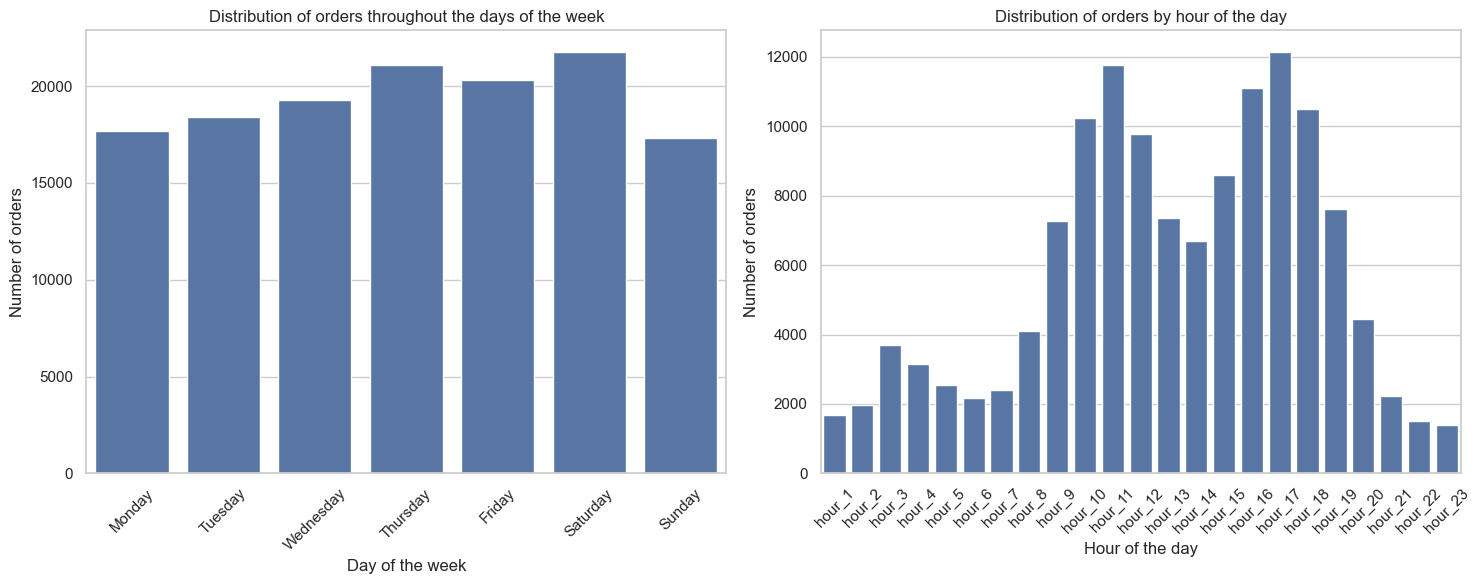

In [23]:
# Create a barplot of the distribution of orders throughout the days of the week
# st theme for the plot
sns.set_theme(style="whitegrid")

# set figsize
fig, ax = plt.subplots(1,2, figsize=(15,6))

sns.barplot(data=day_of_order_distribution, x='day_of_the_week', y='Value', ax=ax[0])
sns.barplot(data=hour_of_order_distribution, x='hour_of_the_day', y='Value', ax=ax[1])

# Set titles and labels for the first subplot
ax[0].set_title('Distribution of orders throughout the days of the week')
ax[0].set_xlabel('Day of the week')
ax[0].set_ylabel('Number of orders')
ax[0].tick_params(axis='x', rotation=45)

# Set titles and labels for the second subplot
ax[1].set_title('Distribution of orders by hour of the day')
ax[1].set_xlabel('Hour of the day')
ax[1].set_ylabel('Number of orders')
ax[1].tick_params(axis='x', rotation=45)

# Show the plot
plt.tight_layout()
plt.show()